In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/heart_disease_cleaned_new.csv')

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/heart_disease_cleaned_new.csv'

In [ ]:
x = df.drop(columns=['target'])
y = df['target']

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [ ]:
x_scaled = x_scaled.reshape((x_scaled.shape[0], x_scaled.shape[1], 1))

In [ ]:
x.shape[1]

13

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# CNN Model
model = Sequential([
    Input(shape=(x_train.shape[1], 1)),

    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    GlobalAveragePooling1D(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_heart_model.h5', save_best_only=True)



In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[early_stop, checkpoint], verbose=1)

Epoch 1/100
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6025 - loss: 0.7092

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.6081 - loss: 0.7046 - val_accuracy: 0.8108 - val_loss: 0.6659
Epoch 2/100
17/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7443 - loss: 0.5444

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7452 - loss: 0.5452 - val_accuracy: 0.7703 - val_loss: 0.6505
Epoch 3/100
17/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7750 - loss: 0.4850

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7731 - loss: 0.4859 - val_accuracy: 0.8514 - val_loss: 0.6356
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8028 - loss: 0.4317

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8023 - loss: 0.4333 - val_accuracy: 0.8243 - val_loss: 0.6274
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7828 - loss: 0.4776

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7830 - loss: 0.4770 - val_accuracy: 0.7432 - val_loss: 0.6077
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7934 - loss: 0.4813

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7933 - loss: 0.4810 - val_accuracy: 0.8311 - val_loss: 0.5684
Epoch 7/100
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8366 - loss: 0.3987

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8337 - loss: 0.4032 - val_accuracy: 0.8311 - val_loss: 0.5625
Epoch 8/100
17/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7872 - loss: 0.4280

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7890 - loss: 0.4272 - val_accuracy: 0.8108 - val_loss: 0.5418
Epoch 9/100
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8229 - loss: 0.4166

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8226 - loss: 0.4162 - val_accuracy: 0.8108 - val_loss: 0.5378
Epoch 10/100
16/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8187 - loss: 0.3984

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8185 - loss: 0.4012 - val_accuracy: 0.8176 - val_loss: 0.5060
Epoch 11/100
16/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8004 - loss: 0.4568

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8030 - loss: 0.4490 - val_accuracy: 0.8378 - val_loss: 0.4607
Epoch 12/100
17/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8067 - loss: 0.4309

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8072 - loss: 0.4269 - val_accuracy: 0.8243 - val_loss: 0.4460
Epoch 13/100
17/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8369 - loss: 0.3503

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8351 - loss: 0.3552 - val_accuracy: 0.8311 - val_loss: 0.4432
Epoch 14/100
16/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8201 - loss: 0.3977

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8218 - loss: 0.3944 - val_accuracy: 0.8311 - val_loss: 0.4343
Epoch 15/100
17/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8214 - loss: 0.3932

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8223 - loss: 0.3920 - val_accuracy: 0.8446 - val_loss: 0.4190
Epoch 16/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8503 - loss: 0.3368 - val_accuracy: 0.8311 - val_loss: 0.4211
Epoch 17/100
17/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8269 - loss: 0.3949

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8279 - loss: 0.3935 - val_accuracy: 0.8446 - val_loss: 0.4033
Epoch 18/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8263 - loss: 0.3800 - val_accuracy: 0.8378 - val_loss: 0.4061
Epoch 19/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8546 - loss: 0.3358 - val_accuracy: 0.8243 - val_loss: 0.4222
Epoch 20/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8553 - loss: 0.3538 - val_accuracy: 0.8243 - val_loss: 0.4106
Epoch 21/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8361 - loss: 0.3793 - val_accuracy: 0.8311 - val_loss: 0.4129
Epoch 22/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8878 - loss: 0.2962 - val_accuracy: 0.8176 - val_loss: 0.4190
Epoch 23/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8591 - loss: 0.3418 - val_accuracy: 0.8108 - val_loss: 0.4327
Epoch 24/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8649 - loss: 0.3536 - val_accuracy: 0.8311 

In [ ]:
y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Accuracy: 0.7717391304347826
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        82
           1       0.79      0.79      0.79       102

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



In [ ]:
# Extract values from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history.get('accuracy', history.history.get('acc'))  # Some versions use 'acc'
val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc'))

epochs = range(1, len(loss) + 1)


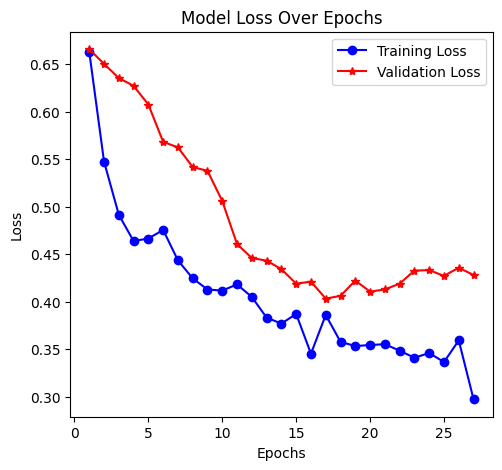

In [ ]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()

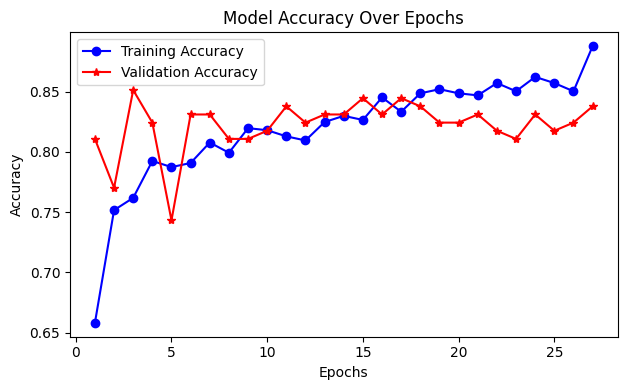

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import os
import time
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.profiler import model_analyzer
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

def evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics"):
    results = {}

    # Total Parameters
    results['total_parameters'] = model.count_params()

    # FLOPs Calculation
    func = tf.function(lambda x: model(x))
    concrete_func = func.get_concrete_function(
        tf.TensorSpec([1] + list(model.input_shape[1:]), model.inputs[0].dtype)
    )
    frozen_func = convert_variables_to_constants_v2(concrete_func)
    flops = model_analyzer.profile(
        graph=frozen_func.graph,
        options=ProfileOptionBuilder.float_operation()
    ).total_float_ops
    results['FLOPs'] = flops
    results['GFLOPs'] = flops / 1e9

    # Model Size
    model_path = f"{model_name}.h5"
    model.save(model_path)
    size_bytes = os.path.getsize(model_path)
    results['model_size_bytes'] = size_bytes
    results['model_size_MB'] = size_bytes / (1024 * 1024)

    # Inference Time
    start = time.time()
    model.predict(x_test)
    end = time.time()
    results['inference_time_seconds'] = end - start

    # Accuracy
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    results['accuracy'] = acc

    return results
evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics")

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


{'total_parameters': 158337,
 'FLOPs': 967745,
 'GFLOPs': 0.000967745,
 'model_size_bytes': 1968520,
 'model_size_MB': 1.8773269653320312,
 'inference_time_seconds': 0.43059611320495605,
 'accuracy': 0.77173912525177}